## Introduction
The aim of this project is to identify profitable Android (Google Play) and iOS (the App Store) mobile apps.

The apps in consideration are free to download and install, and the main source of the company's revenue consists of in-app ads. This means the revenue for any given app is mostly influenced by the number of its users - the more users that see and engage with the ads, the better. Hence it is necessary to analyze available data to understand what type of apps are likely to attract more users both on Google Play and the App Store.
## 1. Data Collection and Exploration
As of [September 2018](https://www.statista.com/statistics/276623/number-of-apps-available-in-leading-app-stores/), there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.

Collecting data for over 4 million apps requires a significant amount of time and money, so we'll try first to analyze a sample of the data instead, to see if we can find any relevant existing data at no cost. For this purpose, there are 2 data sets available in the form of CSV files:

- [Android apps data set](https://www.kaggle.com/lava18/google-play-store-apps) contains data about approximately 10,000 Android apps from Google Play; the data was collected in August 2018.
- [IOS apps data set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) contains data about approximately 7,000 iOS apps from the App Store; the data was collected in July 2017. 

#### I.  Opening the data sets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
ios = pd.read_csv('AppleStore.csv')
ios.head(3)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.00,2974676,212,3.50,3.50,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.00,2161558,1289,4.50,4.00,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.00,2130805,579,4.50,4.50,9.24.12,9+,Games,38,5,18,1


In [3]:
ios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

In [4]:
def plot_correlations(df):
    # create a correlation matrix 
    df_corr = df.corr()
    
    # create a mask to avoid repeated values and make
    # the plot easier to read
    df_corr = df_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(df_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(df_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()

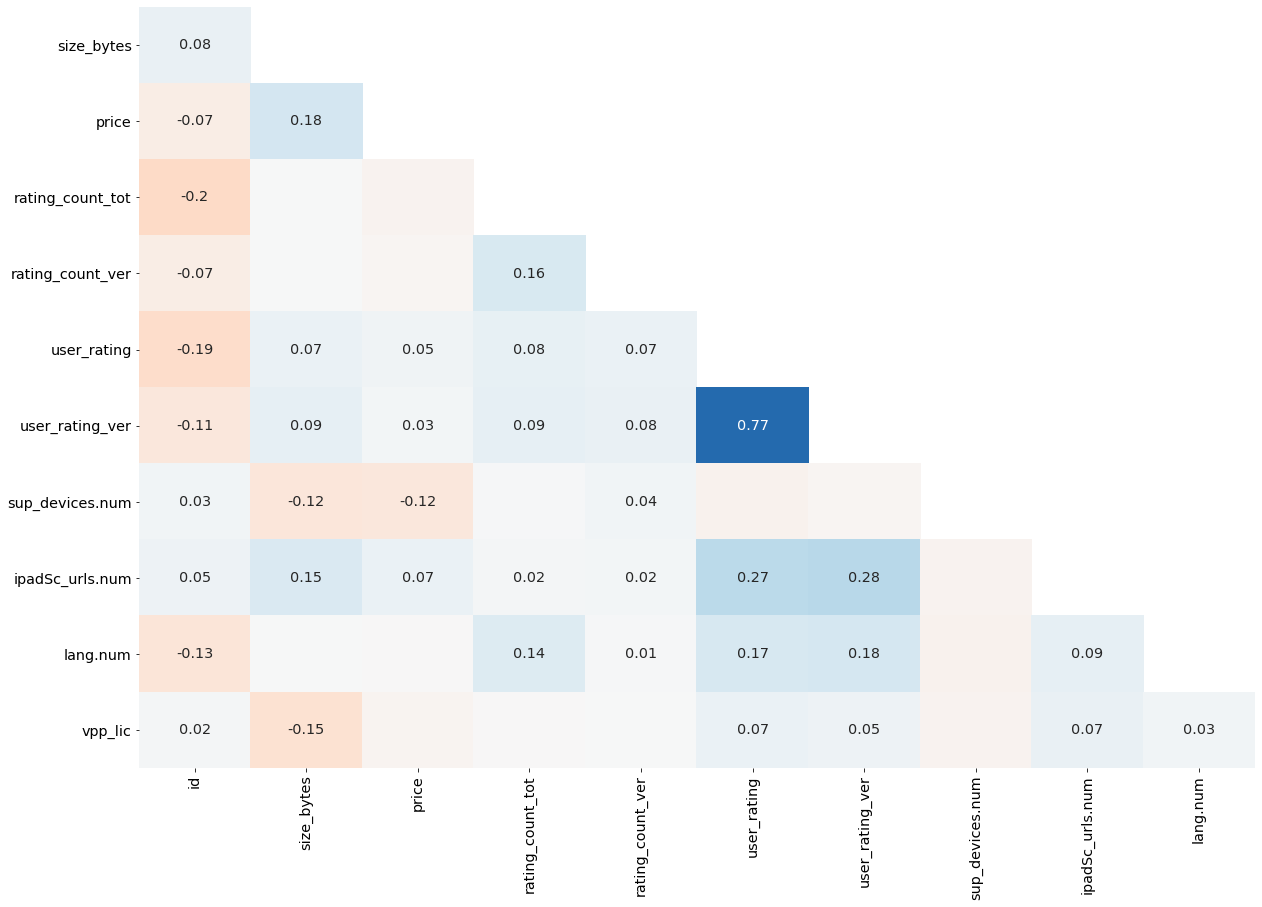

In [5]:
plot_correlations(ios)

In [6]:
ios.isnull().sum()

id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [7]:
android = pd.read_csv('googleplaystore.csv')
android.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [8]:
android.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


In [9]:
android.columns = android.columns.str.lower().str.strip().str.replace(' ','_')
android.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

In [10]:
android.isnull().sum()

app                  0
category             0
rating            1474
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

The Google Play  data set (Android apps) contains 10,841 apps and 13 columns. The most informative columns for us seem to be the following: `'App'`, `'Category'`, `'Rating'`, `'Reviews'`, `'Installs'`, `'Type'`, `'Price'`, `'Content Rating'` and `'Genres'`.

The App Store data set (iOS apps) contains 7,197 apps and 16 columns. The columns potentially useful for our data analysis might be the following: `'track_name'`, `'currency'`, `'price'`, `'rating_count_tot'`, `'rating_count_ver'`, `'user_rating'`, `'user_rating_ver'`, `'cont_rating'` and `'prime_genre'`.

For further details about both data sets and the meaning of each column, the corresponding data set documentation can be addressed: 
[Android apps data set](https://www.kaggle.com/lava18/google-play-store-apps) and [iOS apps data set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps).
#### II. Data Cleaning
##### II.1. Deleting Wrong Data
For both data sets discussion sections are available here: [for Google Play](https://www.kaggle.com/lava18/google-play-store-apps/discussion) and [for the App Store](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/discussion). In the discussion section dedicated to **Google Play data set** in [one of the topics](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) it was reported a wrong value for the row 10,472 (missing `'Rating'` and a column shift for next columns).

In [11]:
android = android[(android['rating']<=5)|(android['rating'].isnull())]
android.shape

(10840, 13)

##### II.2. Deleting Duplicates
Exploring the **Google Play data set**, it was discovered that some apps have duplicate entries. We need to remove the duplicate entries and keep only one entry per app.

In [12]:
android.duplicated(subset=['app']).value_counts()

False    9659
True     1181
dtype: int64

In [13]:
android = android.drop_duplicates(['app'])
android.shape

(9659, 13)

##### II.3. Deleting Non-English Apps
Since our company uses only English to develop its apps,
we'd like to analyze only the apps that are directed toward an English-speaking audience.

Inspecting both data sets, it was detected that both have also apps with non-English names, that is containing symbols unusual for English texts (i.e. not English letters, digits 0-9, punctuation marks, and special symbols). These apps have to be removed.

In [14]:
def english(string):
    non_ascii = 0
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
    if non_ascii > 3:
        return False
    else:
        return True

In [15]:
android=android[android['app'].apply(english)]
android.shape

(9614, 13)

In [16]:
ios = ios[ios['track_name'].apply(english)]
ios.shape

(6183, 16)

After filtering the data set with android apps counts 9,614 rows and the one with iOS apps 6,183 rows.
##### II.4. Deleting Non-Free Apps
The company is specialized in building only free apps. Hence, before proceeding to the data analysis step, we have to remove all non-free apps from both data sets.

In [17]:
ios['price']=ios['price'].astype('float')

In [18]:
ios = ios[ios['price'] == 0.0]
ios.shape

(3222, 16)

In [19]:
android['price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [20]:
android['price']=android['price'].str.replace('$','').astype('float')
android = android[android['price'] == 0]
android.shape

(8862, 13)

Now we have 8,862 android apps and 3,222 iOS apps for further data analysis.
##### II.5 Filling missing values

In [21]:
def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=45, size='x-large')
    plt.show()

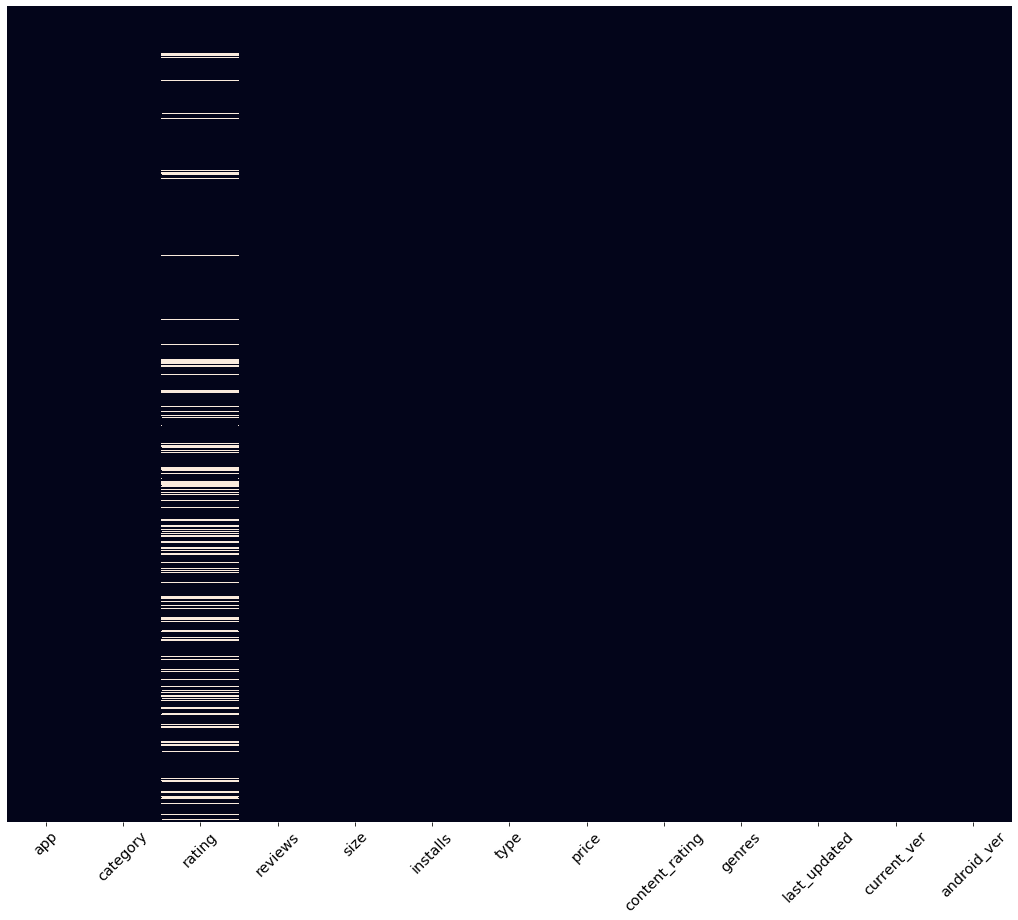

In [22]:
plot_null_matrix(android)

In [23]:
android['rating'].fillna((android['rating'].mean()), inplace=True)

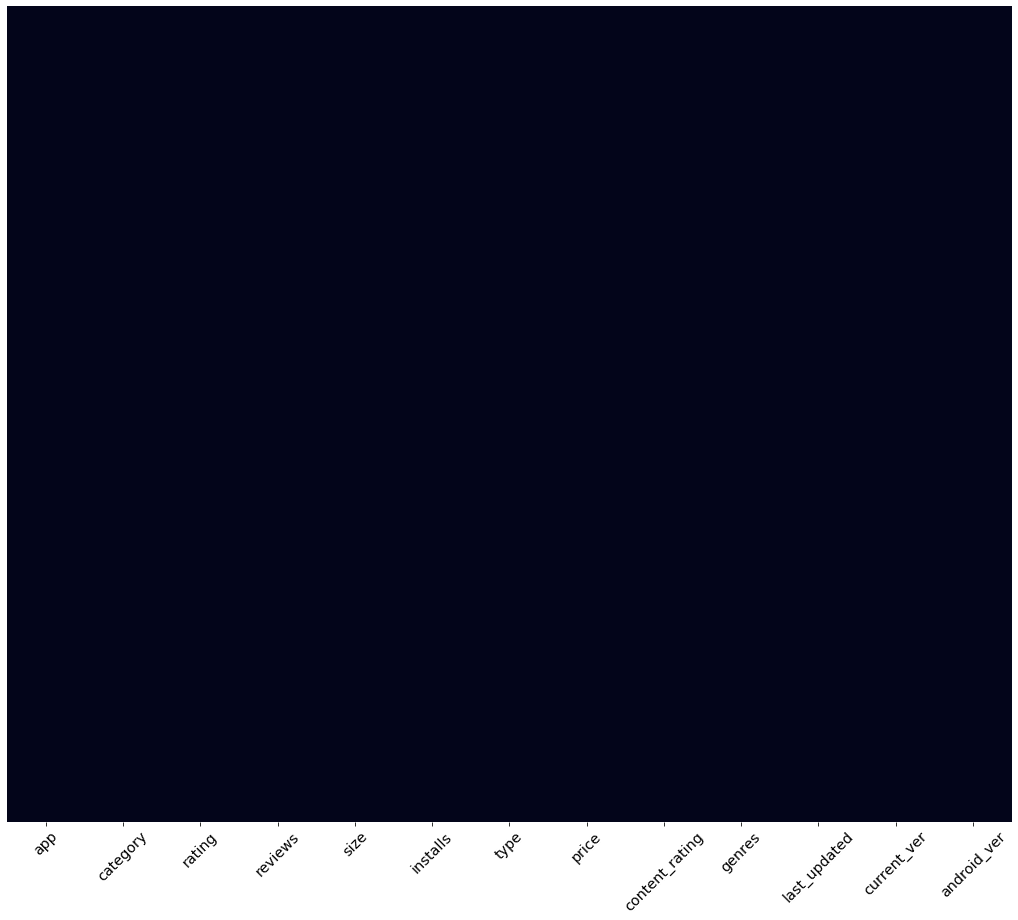

In [24]:
plot_null_matrix(android)

##### II.5 Cleaning 'installs' column

In [25]:
android['installs'] = android['installs'].str.replace('+','').str.replace(',','').astype('float')

In [26]:
android['installs'].value_counts().head()

1000000.00     1394
100000.00      1023
10000000.00     935
10000.00        905
1000.00         744
Name: installs, dtype: int64

Now we have 8,864 android apps and 3,222 iOS apps for further data analysis.
## 3. Data Analysis
As we mentioned in the introduction, our aim is to determine the kinds of apps that are likely to attract more users, because our revenue is highly influenced by the number of people using our apps.

To minimize risks and overhead, our validation strategy for an app idea is comprised of 3 steps:

- Build a minimal Android version of the app, and add it to Google Play.
- If the app has a good response from users, we develop it further.
- If the app is profitable after 6 months, we build an iOS version of the app and add it to the App Store.

Because our final goal is to add the app on both Google Play and the App Store, we need to find app profiles that are successful on both markets.
### 3.1. Finding The Most Common Genres
Let's begin the analysis by getting a sense of what are the most common genres for each market. For Google Play data set the genres of the apps are described in the column `'Genres'` and `'Category'`, for the App Store data set - in the column `'prime_genre'`.

We'll build two functions we can use to analyze the frequency tables:

- To generate frequency tables that show percentages.
- To display the percentages in a frequency table in a descending order.

In [27]:
android_cat=android['category'].value_counts(normalize=True).head(10).sort_values()
android_cat

PERSONALIZATION   0.03
SPORTS            0.03
MEDICAL           0.04
FINANCE           0.04
PRODUCTIVITY      0.04
LIFESTYLE         0.04
BUSINESS          0.05
TOOLS             0.08
GAME              0.10
FAMILY            0.18
Name: category, dtype: float64

(0.0, 0.6)
(-0.7250000000000001, 9.725)


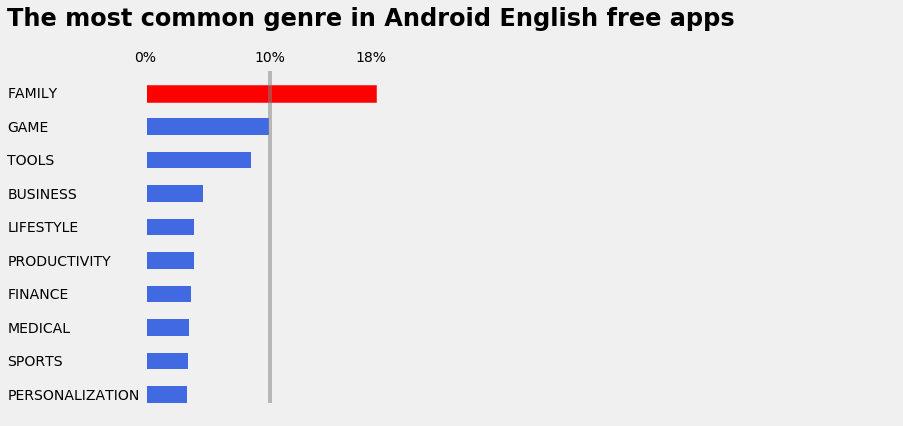

In [28]:
import matplotlib.style as style
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12, 6))
barlist = ax.barh(android_cat.index,android_cat,height=0.5,color='#4169e1')
barlist[-1].set_color('r') 
ax.grid(b=False)
ax.text(x=-0.11,y=11,s='The most common genre in Android English free apps',size = 24,weight='bold')
ax.set_xticks([0, 0.1, 0.18])
ax.set_xticklabels(['0%', '10%', '18%'])
plt.xlim(0,0.6)
ax.xaxis.tick_top()
ax.axvline(x=0.1, ymin=0.045, c='grey',
           alpha=0.5)
genres_names = android_cat.index
ax.set_yticklabels([])
for i, country in zip(range(11), genres_names):
    ax.text(x=-0.11, y=i-0.15, s=country)
print(plt.xlim())
print(plt.ylim())

In [29]:
ios_gen=ios['prime_genre'].value_counts(normalize=True,ascending=False).head(10).sort_values()
ios_gen

Health & Fitness    0.02
Music               0.02
Sports              0.02
Utilities           0.03
Shopping            0.03
Social Networking   0.03
Education           0.04
Photo & Video       0.05
Entertainment       0.08
Games               0.58
Name: prime_genre, dtype: float64

(0.0, 0.610707635009311)
(-0.7250000000000001, 9.725)


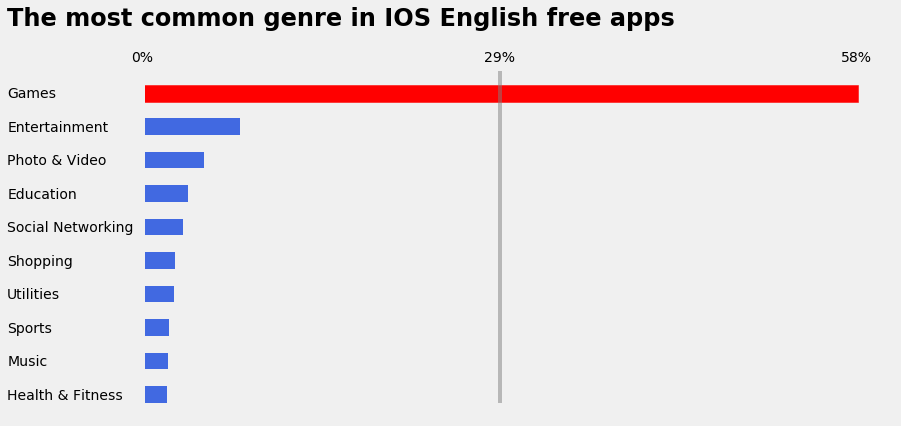

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))
barlist = ax.barh(ios_gen.index,ios_gen,height=0.5,color='#4169e1')
barlist[-1].set_color('r')  
ax.grid(b=False)
ax.text(x=-0.11,y=11,s='The most common genre in IOS English free apps',size = 24,weight='bold')
ax.set_xticks([0, 0.29, 0.58])
ax.set_xticklabels(['0%', '29%', '58%'])
ax.xaxis.tick_top()
ax.axvline(x=0.29, ymin=0.045, c='grey',
           alpha=0.5)
genres_names = ios_gen.index
ax.set_yticklabels([])
for i, country in zip(range(11), genres_names):
    ax.text(x=-0.11, y=i-0.15, s=country)
barlist[-1].set_color('r')    
print(plt.xlim())
print(plt.ylim())

In [31]:
android.groupby('category')['installs'].mean().sort_values(ascending=False).head()

category
COMMUNICATION   38456119.17
VIDEO_PLAYERS   24852732.41
SOCIAL          23253652.13
ENTERTAINMENT   21134600.00
PHOTOGRAPHY     17805627.64
Name: installs, dtype: float64

In [32]:
android[android['category']=='COMMUNICATION'].head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,Varies with device,1000000000.00,Free,0.00,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.40,69119316,Varies with device,1000000000.00,Free,0.00,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
337,Messenger for SMS,COMMUNICATION,4.30,125257,17M,10000000.00,Free,0.00,Teen,Communication,"June 6, 2018",1.8.9,4.1 and up
338,Google Chrome: Fast & Secure,COMMUNICATION,4.30,9642995,Varies with device,1000000000.00,Free,0.00,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
339,Messenger Lite: Free Calls & Messages,COMMUNICATION,4.40,1429035,Varies with device,100000000.00,Free,0.00,Everyone,Communication,"July 25, 2018",37.0.0.7.163,2.3 and up


In [33]:
android_genre = android.groupby('category')['installs'].mean().sort_values(ascending=False).head(10).sort_values()
android_genre

category
NEWS_AND_MAGAZINES    9549178.47
TOOLS                10695245.29
TRAVEL_AND_LOCAL     13984077.71
GAME                 15837565.09
PRODUCTIVITY         16787331.34
PHOTOGRAPHY          17805627.64
ENTERTAINMENT        21134600.00
SOCIAL               23253652.13
VIDEO_PLAYERS        24852732.41
COMMUNICATION        38456119.17
Name: installs, dtype: float64

(0.0, 40378925.125609756)
(-0.7250000000000001, 9.725)


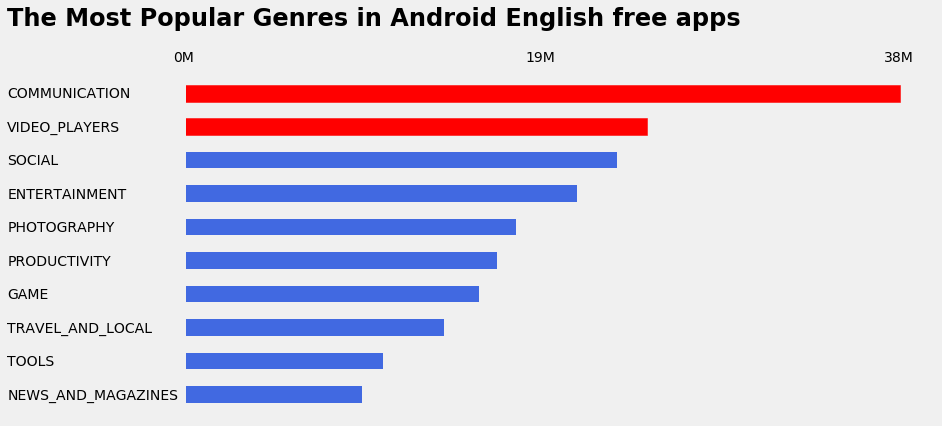

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))
barlist = ax.barh(android_genre.index,android_genre,height=0.5,color='#4169e1')
barlist[-1].set_color('r')
barlist[-2].set_color('r')  
ax.grid(b=False)
ax.text(x=-9500000,y=11,s='The Most Popular Genres in Android English free apps',size = 24,weight='bold')
ax.set_xticks([0, 19138925, 38378925])
ax.set_xticklabels(['0M', '19M', '38M'])
ax.xaxis.tick_top()
ax.axvline(x=0.29, ymin=0.045, c='grey',
           alpha=0.5)
genres_names = android_genre.index
ax.set_yticklabels([])
for i, country in zip(range(11), genres_names):
    ax.text(x=-9500000, y=i-0.15, s=country)
print(plt.xlim())
print(plt.ylim())

In [35]:
ios.groupby('prime_genre')['rating_count_tot'].mean().sort_values(ascending=False).head()

prime_genre
Navigation          86090.33
Reference           74942.11
Social Networking   71548.35
Music               57326.53
Weather             52279.89
Name: rating_count_tot, dtype: float64

In [36]:
ios[ios['prime_genre']=='Navigation']

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
49,323229106,"Waze - GPS Navigation, Maps & Real-time Traffic",94139392,USD,0.00,345046,3040,4.50,4.50,4.24,4+,Navigation,37,5,36,1
130,585027354,Google Maps - Navigation & Transit,120232960,USD,0.00,154911,1253,4.50,4.00,4.31.1,12+,Navigation,37,5,34,1
881,329541503,Geocaching®,108166144,USD,0.00,12811,134,3.50,1.50,5.3,4+,Navigation,37,0,22,1
1633,504677517,CoPilot GPS – Car Navigation & Offline Maps,82534400,USD,0.00,3582,70,4.00,3.50,10.0.0.984,4+,Navigation,38,5,25,1
3987,344176018,ImmobilienScout24: Real Estate Search in Germany,126867456,USD,0.00,187,0,3.50,0.00,9.5,4+,Navigation,37,5,3,1
6033,463431091,Railway Route Search,46950400,USD,0.00,5,0,3.00,0.00,3.17.1,4+,Navigation,37,0,1,1


In [37]:
ios_genre = ios.groupby('prime_genre')['rating_count_tot'].mean().sort_values(ascending=False).head(10).sort_values()
ios_genre

prime_genre
Travel              28243.80
Photo & Video       28441.54
Finance             31467.94
Food & Drink        33333.92
Book                39758.50
Weather             52279.89
Music               57326.53
Social Networking   71548.35
Reference           74942.11
Navigation          86090.33
Name: rating_count_tot, dtype: float64

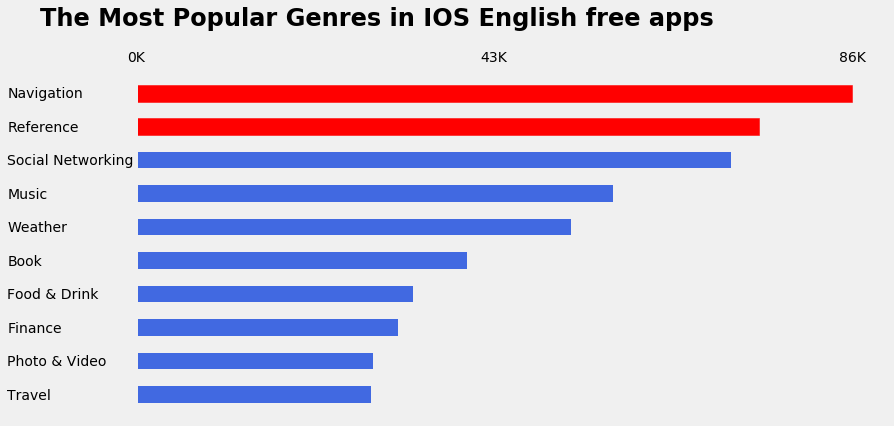

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))
barlist = ax.barh(ios_genre.index,ios_genre,height=0.5,color='#4169e1')
barlist[-1].set_color('r')
barlist[-2].set_color('r')  
ax.grid(b=False)
ax.text(x=-11500,y=11,s='The Most Popular Genres in IOS English free apps',size = 24,weight='bold')
ax.set_xticks([0, 43050, 86100])
ax.set_xticklabels(['0K', '43K', '86K'])
ax.xaxis.tick_top()
ax.axvline(x=0.29, ymin=0.045, c='grey',
           alpha=0.5)
genres_names = ios_genre.index
ax.set_yticklabels([])
for i, country in zip(range(11), genres_names):
    ax.text(x=-15500, y=i-0.15, s=country)